In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/tamim_t20_jan_2020_stat_cricinfo.csv', index_col='date', parse_dates=True)

In [4]:
df.head()

,runs,opposition,ground
date,,,
2007-01-09,11,Kenya,Nairobi (Gym)
2007-02-09,1,Pakistan,Nairobi (Gym)
2007-09-13,10,West Indies,Johannesburg
2007-09-15,8,South Africa,Cape Town
2007-09-16,32,Australia,Cape Town


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2007-01-09 to 2020-01-25
Data columns (total 3 columns):
runs          77 non-null int64
opposition    77 non-null object
ground        77 non-null object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [0]:
df['opposition'] = df.opposition.astype('category')
df['ground'] = df.ground.astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2007-01-09 to 2020-01-25
Data columns (total 3 columns):
runs          77 non-null int64
opposition    77 non-null category
ground        77 non-null category
dtypes: category(2), int64(1)
memory usage: 3.6 KB


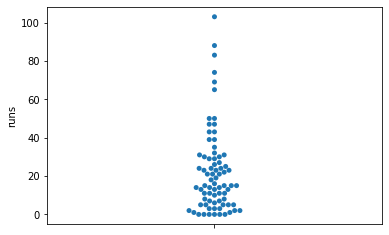

In [15]:
plt.clf()
sns.swarmplot(y=df['runs'], data=df, hue=df['opposition'])
plt.show()

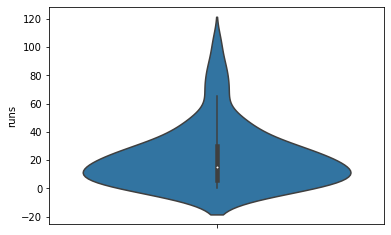

In [16]:
sns.violinplot(y='runs', data=df, hue='ground')
plt.show()

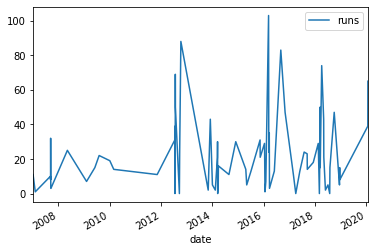

In [21]:
df.plot()

(array([15., 13.,  6.,  7., 12.,  6.,  4.,  7.,  5.,  2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

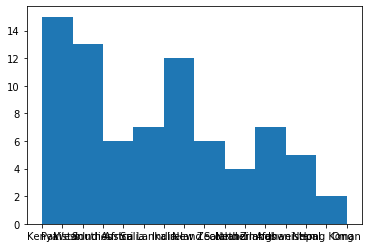

In [11]:
plt.hist(df.opposition)

In [25]:
df.groupby('opposition').mean()

,runs
opposition,
Afghanistan,17.250000
Australia,18.500000
Hong Kong,0.000000
India,18.000000
Ireland,27.800000
Kenya,11.000000
Nepal,30.000000
Netherlands,67.333333
New Zealand,10.833333


In [30]:
df.groupby('opposition').std()

,runs
opposition,
Afghanistan,19.362765
Australia,19.091883
Hong Kong,NaN
India,9.712535
Ireland,18.102486
Kenya,NaN
Nepal,NaN
Netherlands,16.563011
New Zealand,8.565434


In [0]:
df.groupby('ground').mean()

In [40]:
df_match = df[['opposition', 'ground']].groupby('opposition').count()
df_match.columns = ['matches']
print(df_match)

              matches
opposition           
Afghanistan         4
Australia           2
Hong Kong           1
India               7
Ireland             5
Kenya               1
Nepal               1
Netherlands         3
New Zealand         6
Oman                1
Pakistan           14
Scotland            1
South Africa        4
Sri Lanka           7
West Indies        13
Zimbabwe            7
